*Black Firday Dataset EDA And Feature Engineering*

Cleaning and preparing the data for the model

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [108]:
#importing the dataset train
df_train = pd.read_csv("blackFriday_train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [109]:
#importing the dataset test
df_test = pd.read_csv("blackFriday_Test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [110]:
## Merge both train and test dataset
df = pd.merge(df_train,df_test , how="left")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [112]:
df.drop(['User_ID'], axis=1,inplace=True)

In [113]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [114]:
df['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
550063    M
550064    F
550065    F
550066    F
550067    F
Name: Gender, Length: 550068, dtype: object

In [115]:
#Handling categorical featue Gender
df['Gender'] = df['Gender'].map({'F':0,'M':'1'})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [116]:
## Handle categorical feature Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [117]:
df['Gender']

0         0
1         0
2         0
3         0
4         1
         ..
550063    1
550064    0
550065    0
550066    0
550067    0
Name: Gender, Length: 550068, dtype: object

In [118]:
pd.get_dummies(df['Age'],drop_first='True',dtype=int)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
550063,0,0,0,0,1,0
550064,0,1,0,0,0,0
550065,0,1,0,0,0,0
550066,0,0,0,0,0,1


In [119]:
#Handling Numerical data feature convert to 1 to 6 number Age
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':6})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969


In [120]:
## Second technique
from sklearn import preprocessing

# Label_encoder object knows how to understand word Labels.
Label_encoder = preprocessing.LabelEncoder()

# Encode Labels in column 'species'.
df['Age'] = Label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 5, 2, 4, 3, 1], dtype=int64)

In [121]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,5,16,C,4+,0,8,NaN,NaN,7969


In [122]:
## fixing categorical City_categort
df_city = pd.get_dummies(df['City_Category'],drop_first=True)

In [123]:
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [124]:
df = pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370,False,False
1,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422,False,False
3,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057,False,False
4,P00285442,1,5,16,C,4+,0,8,NaN,NaN,7969,False,True


In [125]:
## drop City Category Feature
df.drop('City_Category', axis=1,inplace= True)

In [126]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,NaN,NaN,8370,False,False
1,P00248942,0,0,10,2,0,1,6.0,14.0,15200,False,False
2,P00087842,0,0,10,2,0,12,NaN,NaN,1422,False,False
3,P00085442,0,0,10,2,0,12,14.0,NaN,1057,False,False
4,P00285442,1,5,16,4+,0,8,NaN,NaN,7969,False,True


In [127]:
# Missing Values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
B                                  0
C                                  0
dtype: int64

In [128]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [129]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: count, dtype: int64

In [130]:
df['Product_Category_2'].mode()[0]

8.0

In [131]:
## Replace the missing value with mode

df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2']).mean()

In [132]:
df['Product_Category_2'].isnull().sum()

0

In [133]:
## Product_category 3 replace missing values
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [134]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    32636
15.0    28013
14.0    18428
17.0    16702
5.0     16658
8.0     12562
9.0     11579
12.0     9246
13.0     5459
6.0      4890
18.0     4629
4.0      1875
11.0     1805
10.0     1726
3.0       613
Name: count, dtype: int64

In [135]:
df['Product_Category_3'].isnull().sum()

383247

In [136]:
df['Product_Category_3'].mode()[0]

16.0

In [137]:
## Replace the missing value with mode

df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3']).mean()

In [138]:
df['Product_Category_2'].isnull().sum()

0

In [139]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,9.842329,12.668243,8370,False,False
1,P00248942,0,0,10,2,0,1,9.842329,12.668243,15200,False,False
2,P00087842,0,0,10,2,0,12,9.842329,12.668243,1422,False,False
3,P00085442,0,0,10,2,0,12,9.842329,12.668243,1057,False,False
4,P00285442,1,5,16,4+,0,8,9.842329,12.668243,7969,False,True


In [140]:
df.shape

(550068, 12)

In [141]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [142]:
df['Stay_In_Current_City_Years']= df['Stay_In_Current_City_Years'].str.replace('+','')

In [143]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,9.842329,12.668243,8370,False,False
1,P00248942,0,0,10,2,0,1,9.842329,12.668243,15200,False,False
2,P00087842,0,0,10,2,0,12,9.842329,12.668243,1422,False,False
3,P00085442,0,0,10,2,0,12,9.842329,12.668243,1057,False,False
4,P00285442,1,5,16,4,0,8,9.842329,12.668243,7969,False,True


In [144]:
# Convert False/True to 0/1 in 'B' and 'C' columns
df[['B', 'C']] = df[['B', 'C']].astype(int)

In [145]:
df[['B','C']]

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [146]:
df

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,9.842329,12.668243,8370,0,0
1,P00248942,0,0,10,2,0,1,9.842329,12.668243,15200,0,0
2,P00087842,0,0,10,2,0,12,9.842329,12.668243,1422,0,0
3,P00085442,0,0,10,2,0,12,9.842329,12.668243,1057,0,0
4,P00285442,1,5,16,4,0,8,9.842329,12.668243,7969,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,P00372445,1,5,13,1,1,20,9.842329,12.668243,368,1,0
550064,P00375436,0,2,1,3,0,20,9.842329,12.668243,371,0,1
550065,P00375436,0,2,15,4,1,20,9.842329,12.668243,137,1,0
550066,P00375436,0,5,1,2,0,20,9.842329,12.668243,365,0,1


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  object 
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 46.2+ MB


In [148]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [149]:
df['Stay_In_Current_City_Years']

0         2
1         2
2         2
3         2
4         4
         ..
550063    1
550064    3
550065    4
550066    2
550067    4
Name: Stay_In_Current_City_Years, Length: 550068, dtype: int32

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  object 
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   Stay_In_Current_City_Years  550068 non-null  int32  
 5   Marital_Status              550068 non-null  int64  
 6   Product_Category_1          550068 non-null  int64  
 7   Product_Category_2          550068 non-null  float64
 8   Product_Category_3          550068 non-null  float64
 9   Purchase                    550068 non-null  int64  
 10  B                           550068 non-null  int32  
 11  C                           550068 non-null  int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 44.1+ MB


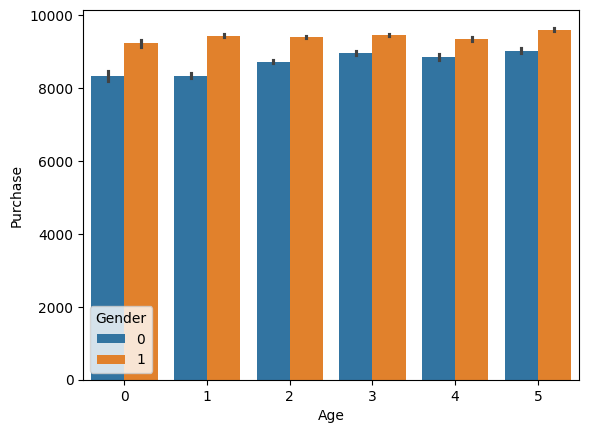

In [151]:
import seaborn as sns

# Assuming df is your DataFrame and you want to plot 'Purchase' vs 'Age' with 'Gender' as hue
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)
plt.show()

*Purchasing of men is high then women*

<Axes: xlabel='Occupation', ylabel='Purchase'>

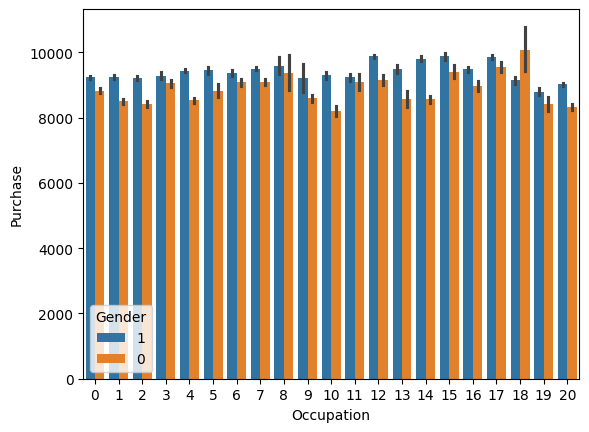

In [152]:
sns.barplot(x='Occupation',y='Purchase',hue='Gender', data=df)


<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

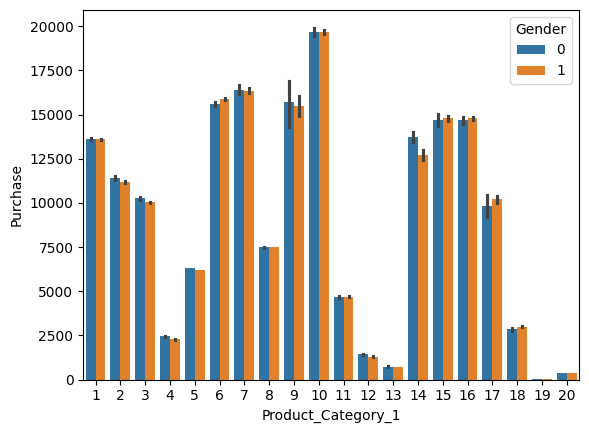

In [153]:
sns.barplot(x='Product_Category_1',y='Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

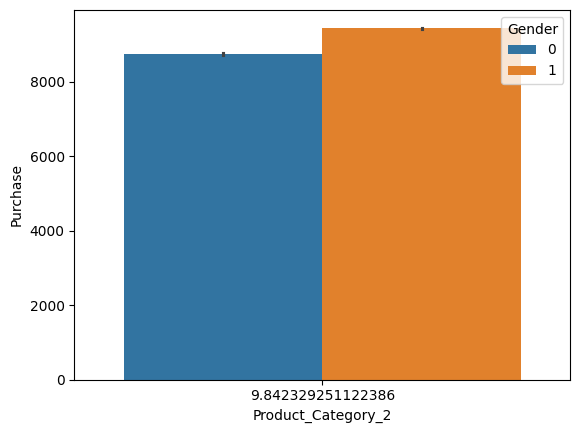

In [154]:
sns.barplot(x='Product_Category_2', y= 'Purchase',hue='Gender',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

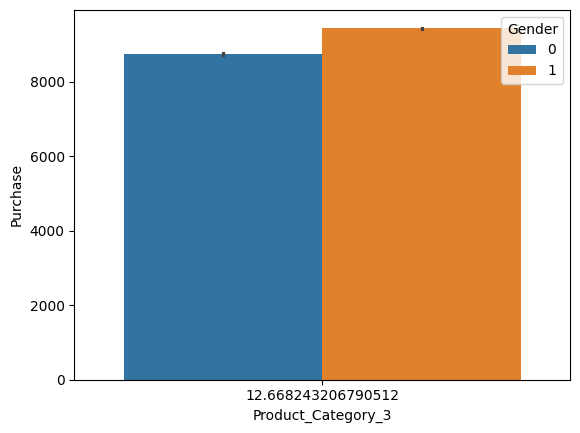

In [155]:
sns.barplot(x='Product_Category_3', y= 'Purchase',hue='Gender',data=df)

In [156]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,0,10,2,0,3,9.842329,12.668243,8370,0,0
1,P00248942,0,0,10,2,0,1,9.842329,12.668243,15200,0,0
2,P00087842,0,0,10,2,0,12,9.842329,12.668243,1422,0,0
3,P00085442,0,0,10,2,0,12,9.842329,12.668243,1057,0,0
4,P00285442,1,5,16,4,0,8,9.842329,12.668243,7969,0,1


*feature scaling*

In [157]:
df_test = df[df['Purchase'].isnull()]

In [158]:
df_train = df[~df['Purchase'].isnull()]

In [159]:
X = df_train.drop('Purchase',axis=1)

In [160]:
X.shape

(550068, 11)

In [161]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,0,10,2,0,3,9.842329,12.668243,0,0
1,P00248942,0,0,10,2,0,1,9.842329,12.668243,0,0
2,P00087842,0,0,10,2,0,12,9.842329,12.668243,0,0
3,P00085442,0,0,10,2,0,12,9.842329,12.668243,0,0
4,P00285442,1,5,16,4,0,8,9.842329,12.668243,0,1


In [162]:
y = df_train['Purchase']

In [163]:
y.shape

(550068,)

In [164]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X , y, test_size = 0.33, random_state = 42)

*Feature Scaling*

In [165]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [167]:
## Feature SCaling 
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
